> ### Note on Labs and Assignments:
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> These sections are graded and are not optional.
>

# Lab 11: Linear Regression for HR

In this lab, we’ll use the merged HR dataset to build a **linear regression model** to predict the number of years that an employee will work for the company (job tenure).

### Problem Statement
A large company employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this employee turnover is bad for the company, because of the following reasons -

- The former employees’ projects get delayed, which makes it difficult to meet timelines, resulting in a reputation loss among consumers and partners
- A sizeable department has to be maintained, for the purposes of recruiting new talent
- More often than not, the new employees have to be trained for the job and/or given time to acclimatise themselves to the company

Hence, the management has contracted an HR analytics firm to understand what factors they should focus on, in order to increase the number of years that employees stay with the company. In other words, they want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

Since you are one of the star analysts at the firm, this project has been given to you.

### Goal of the case study
You are required to model the number of years employees work for the company using a llinear regression. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.


### Analytics Objectives:
1. Load and explore the dataset
2. Clean and prepare features
3. Encode categorical variables
4. Split the data into training and test sets
5. Train and evaluate a linear regression model
6. Reflect on variable importance and model fit

**Target Variable:** `YearsAtCompany`


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_11_regression.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Overview

**Dataset:** `merged_hr_data.csv`  
Source: [Kaggle HR Analytics Case Study](https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study)

| Variable                      | Type        | Description |
|-------------------------------|-------------|-------------|
| `Age`                         | Numeric     | Age of the employee |
| `Attrition`                   | Categorical | Whether the employee has left the company (Yes/No) |
| `BusinessTravel`              | Categorical | Frequency of business travel |
| `Department`                  | Categorical | Department name |
| `DistanceFromHome`           | Numeric     | Distance from home to work (in km) |
| `Education`                  | Ordinal     | Employee education level (1–5) |
| `EducationField`             | Categorical | Field of education |
| `EmployeeID`                 | Identifier  | Unique identifier for employee |
| `EmployeeCount`              | Constant    | Always 1 (not useful for modeling) |
| `EnvironmentSatisfaction`    | Ordinal     | Satisfaction with the environment (1–4) |
| `Gender`                     | Categorical | Gender of the employee |
| `JobInvolvement`             | Ordinal     | Level of involvement with job (1–4) |
| `JobLevel`                   | Ordinal     | Employee level (1–5) |
| `JobRole`                    | Categorical | Job title |
| `JobSatisfaction`            | Ordinal     | Satisfaction with the job (1–4) |
| `MaritalStatus`              | Categorical | Marital status |
| `MonthlyIncome`              | Numeric     | Monthly salary in USD |
| `NumCompaniesWorked`         | Numeric     | Number of companies previously worked for |
| `Over18`                     | Constant    | Always "Y" (not useful) |
| `PercentSalaryHike`          | Numeric     | Percentage salary increase |
| `PerformanceRating`          | Ordinal     | Performance rating (1–4) |
| `StandardHours`              | Constant    | Always 80 (not useful) |
| `StockOptionLevel`           | Ordinal     | Stock options level (0–3) |
| `TotalWorkingYears`          | Numeric     | Total years of professional experience |
| `TrainingTimesLastYear`      | Numeric     | Number of training sessions attended last year |
| `WorkLifeBalance`            | Ordinal     | Work-life balance rating (1–4) |
| `YearsAtCompany`             | Numeric     | Years spent at the current company |
| `YearsInCurrentRole`         | Numeric     | Years spent in current role |
| `YearsSinceLastPromotion`    | Numeric     | Years since last promotion |
| `YearsWithCurrManager`       | Numeric     | Years with current manager |
| `JobSatisfaction`            | Ordinal     | Self-reported job satisfaction (1–4) |
| `EnvironmentSatisfaction`    | Ordinal     | Satisfaction with the work environment (1–4) |
| `WorkLifeBalance`            | Ordinal     | Work-life balance rating (1–4) |
| `JobInvolvement`             | Ordinal     | Employee’s job involvement level (1–4) |
| `PerformanceRating`          | Ordinal     | Most recent performance rating |



## Part 1: Load data and packages




In [1]:
import pandas as pd

# Load the merged HR dataset
url = "https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/refs/heads/main/DataSets/merged_hr_data.csv"
df = pd.read_csv(url)

# Preview structure
print("Shape:", df.shape)
df.head()


Shape: (4410, 29)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


## Part 2: Data Cleaning

Real-world HR data often contains administrative fields (e.g., ID numbers), constants (same value for all rows), or missing values.

### What We’re Doing:
- Remove irrelevant or constant columns: `EmployeeCount`, `Over18`, `StandardHours`, `EmployeeID`
- Drop rows with missing data

### Why It Matters:
- Non-informative or redundant features can reduce model accuracy and interpretability.
- Regression does not handle missing values natively, so we need a clean dataset.
- Dropping some rows is reasonable here due to the relatively small number of nulls.

> Ethical Note: In practice, dropping rows may disproportionately exclude certain groups—so this step should be handled with caution.


In [2]:
# Drop unnecessary columns
drop_cols = ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID', 'Attrition']
df.drop(columns=drop_cols, inplace=True)

# Drop rows with any missing values
df.dropna(inplace=True)

# Check result
print("After cleaning:", df.shape)


After cleaning: (4300, 24)


## Part 3: Encode Categorical Variables

Machine learning algorithms like linear regression require **numeric inputs**. To use categorical data like `Gender` or `JobRole`, we convert them into **dummy variables** using one-hot encoding.

### Key Steps:
- Use `pd.get_dummies()` with `drop_first=True` to avoid multicollinearity

### Why It Matters:
- Ensures model can interpret categorical inputs numerically
- Dropping the first dummy prevents the "dummy variable trap" where one variable is a linear combination of others
- Accurate encoding helps ensure model fairness and interpretability

> Reminder: Avoid encoding identifiers or columns with too many unique levels without reduction.



In [3]:
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Preview encoded columns
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4300 entries, 0 to 4408
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4300 non-null   int64  
 1   DistanceFromHome                   4300 non-null   int64  
 2   Education                          4300 non-null   int64  
 3   JobLevel                           4300 non-null   int64  
 4   MonthlyIncome                      4300 non-null   int64  
 5   NumCompaniesWorked                 4300 non-null   float64
 6   PercentSalaryHike                  4300 non-null   int64  
 7   StockOptionLevel                   4300 non-null   int64  
 8   TotalWorkingYears                  4300 non-null   float64
 9   TrainingTimesLastYear              4300 non-null   int64  
 10  YearsAtCompany                     4300 non-null   int64  
 11  YearsSinceLastPromotion            4300 non-null   int64  
 1

### 🔧 Try It Yourself - Part 3

1. How many new columns were created during one-hot encoding?  
2. Why is it important to avoid including columns like `EmployeeID` in modeling?
3. Our model is trying to predict employment longevity.  Why is `Attrition` problematic for predicting years at the company?

Write a few sentences on each of the questions above. No coding is required here.


🔧 Add comment here:

How many new columns were created during one-hot encoding? During one-hot encoding, a total of 20 new dummy columns were created from the 6 categorical features. Since the original categorical columns were dropped, the net increase in the number of columns in the DataFrame was 14 (38 total columns in df_encoded minus 24 columns in df before encoding).

Why is it important to avoid including columns like EmployeeID in modeling? EmployeeID is a unique identifier for each employee and carries no inherent predictive information about job tenure. Including such a column would lead to overfitting, as the model would learn to associate each unique ID with a specific outcome, rather than generalizing patterns from meaningful features. It essentially acts as a random noise feature in a predictive model.

Our model is trying to predict employment longevity. Why is Attrition problematic for predicting years at the company? Attrition indicates whether an employee has already left the company. If Attrition is 'Yes', it means the employee's YearsAtCompany is a final, observed value because they have left. If Attrition is 'No', the employee is still with the company, and their YearsAtCompany is an ongoing value, potentially still increasing. Using Attrition to predict YearsAtCompany can lead to data leakage, as Attrition is a direct outcome or a very strong indicator of the final YearsAtCompany value. It essentially tells the model if the employee's tenure is complete, rather than providing independent predictive factors for how long they will stay.



### Part 4: Standardizing Features for Regression

When using models like **linear regression**, it's highly recommended to ensure all numeric features are on a similar scale. This helps the model converge more reliably and prevents features with larger magnitudes from dominating the learning process.

In this step, we'll use `StandardScaler` from `sklearn` to scale all feature columns to have a mean of 0 and a standard deviation of 1.

This is especially important your dataset includes variables with vastly different units or scales (e.g., "Age" vs. "MonthlyIncome")

> **Note:** The target variable (`YearsAtCompany`) should **not** be scaled — only the input features.

---


In [4]:
from sklearn.preprocessing import StandardScaler

# Separate the features and the target
X = df_encoded.drop(columns=['YearsAtCompany'])
y = df_encoded['YearsAtCompany']

# Apply standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reconstruct scaled DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)

# Preview the scaled features
X.head()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1.538800,-0.394993,-0.891282,-0.964277,1.405193,-0.677226,-1.149725,-0.931939,-1.320442,2.483520,...,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668,1.088049,-0.688195
1,-0.648079,0.099071,-1.867220,-0.964277,-0.492557,-1.077952,2.126858,0.239797,-0.678523,0.157924,...,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,2.001455,-0.534682,-0.243668,-0.919077,1.453077
2,-0.538735,0.963683,1.060595,1.746964,2.725773,-0.677226,-0.057531,2.583269,-0.806907,-0.617274,...,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,1.870269,-0.243668,1.088049,-0.688195
3,0.117329,-0.889057,2.036534,0.843217,0.385846,0.124225,-1.149725,2.583269,0.220163,1.708321,...,5.188649,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,-0.534682,-0.243668,1.088049,-0.688195
4,-0.538735,0.099071,-1.867220,-0.964277,-0.885202,0.524950,-0.876677,1.411533,-0.293372,-0.617274,...,-0.192728,-0.462235,-0.27337,-0.329877,-0.240438,-0.499637,1.870269,-0.243668,-0.919077,1.453077


### 🔧 Try It Yourself - Part 4

You've now scaled your features using `StandardScaler`, which makes each feature have a mean of 0 and a standard deviation of 1.

**Think about this:**
Suppose we didn't standardize the features and trained a regression model using raw input data instead. What might happen to the interpretation or relative importance of the coefficients?

**Write one or two sentences** explaining how not standardizing the data could affect the model's performance or interpretability.


🔧 Add comment here: If features are not standardized, coefficients of a linear regression model would reflect the original scale of each feature. This means that features with larger numerical ranges would tend to have smaller coefficients, while features with smaller ranges would have larger coefficients, making it difficult to directly compare their relative importance based on coefficient magnitude alone. It can also lead to slower convergence during training for some optimization algorithms, though it generally doesn't affect the final performance of a standard OLS linear regression model in terms of predictive accuracy, only the interpretation of coefficients.

## Part 5: Train-Test Split

We'll split the dataset into:
- 80% for training
- 20% for testing

To preserve class proportions, we **stratify on our target variable**. This ensures fair evaluation.

> This step helps avoid training/test imbalance especially in classification tasks.



In [5]:
from sklearn.model_selection import train_test_split

# Use already standardized features in X, and original target y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Check the shapes of the splits
X_train.shape, X_test.shape



((3440, 37), (860, 37))

### 🔧 Try It Yourself - Part 5

1. In the code cell below, calculate what average `YearsAtCompany` for all employees
2. Then answer the following question in the markdown cell: Why is stratified sampling especially important for classification?


In [7]:
# 🔧 Add code here

Average YearsAtCompany for all employees: 7.03 years


🔧 Add comment here: Stratified sampling is crucial for classification tasks, especially when dealing with imbalanced datasets, because it ensures that the proportion of each class in the training and testing sets is representative of the original dataset. Without stratification, random sampling might lead to test sets (or even training sets) with very few or no examples of minority classes, severely hindering the model's ability to learn and generalize for those classes, resulting in biased models and misleading evaluation metrics.

## Part 6: Train the Regression

Now we fit a linear regression model using the training data.  

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Display coefficients in order of highest to lowest correlation
coefficients_linear = pd.Series(linear_model.coef_, index=X.columns)
print("\nLinear Regression Coefficients (ordered):")
print(coefficients_linear.sort_values(ascending=False))



Linear Regression Coefficients (ordered):
YearsWithCurrManager                 2.870782
TotalWorkingYears                    2.457193
YearsSinceLastPromotion              1.375845
JobRole_Manager                      0.195138
PercentSalaryHike                    0.123066
Department_Research & Development    0.109899
EducationField_Other                 0.097290
DistanceFromHome                     0.083271
Department_Sales                     0.074728
JobRole_Research Director            0.068396
JobRole_Human Resources              0.068217
JobSatisfaction                      0.062943
TrainingTimesLastYear                0.048558
JobRole_Manufacturing Director       0.027006
EducationField_Marketing             0.016536
WorkLifeBalance                      0.015945
StockOptionLevel                     0.014536
BusinessTravel_Travel_Frequently     0.012125
JobInvolvement                       0.008352
EnvironmentSatisfaction              0.006789
JobRole_Sales Executive             -

### 🔧 Try It Yourself - Part 6

1. Which features are most positively associated with high job tenure (years at company)?
2. Which features are most negatively associated with staying?

Write a few sentences on each of the questions above. No coding is required here.

🔧 Add comment here: Most Positively Associated with High Job Tenure:

The features with the highest positive coefficients are YearsWithCurrManager, TotalWorkingYears, and YearsSinceLastPromotion. This suggests that employees who have spent more years with their current manager, have more total working years experience, and have had more years since their last promotion tend to stay longer at the company.

Most Negatively Associated with Staying:

Conversely, the features with the highest negative coefficients are NumCompaniesWorked, Age, and EducationField_Medical. This indicates that employees who have worked for more companies previously, are older, or are in the Medical education field tend to have shorter tenures at the current company.



## Part 7: Evaluate Model Performance

Let’s test how well our model generalizes to unseen data. We'll compute:
- Mean Squared Error (MSE)
- R-Squared

In [9]:
# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 9.88
R-squared (R2): 0.75


Now visualize the model output

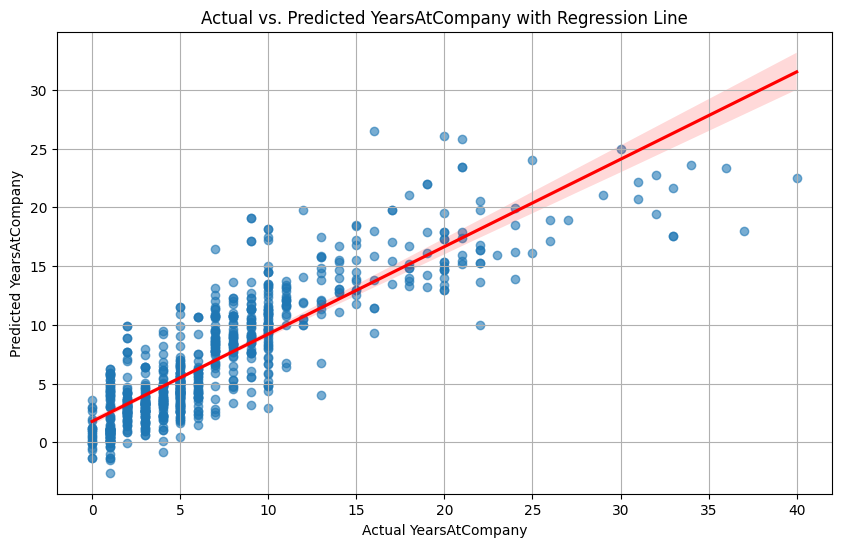

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of predicted vs actual YearsAtCompany
plt.figure(figsize=(10, 6))
ax = sns.regplot(x=y_test, y=y_pred_linear, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
ax.set_xlabel("Actual YearsAtCompany")
ax.set_ylabel("Predicted YearsAtCompany")
plt.title("Actual vs. Predicted YearsAtCompany with Regression Line")
plt.grid(True)
plt.show()

### 🔧 Try It Yourself - Part 7

1. Is this R-squared fit good?
2. How could we improve the fit?

🔧 Add comment here: Is this R-squared fit good? An R-squared value of 0.75 means that 75% of the variance in YearsAtCompany can be explained by the features in our linear regression model. For many real-world datasets, especially in human resources where many factors influence behavior, this is generally considered a reasonably good fit. It indicates a strong relationship between our predictors and the target variable, although 25% of the variance remains unexplained, suggesting there's room for improvement or that other unmeasured factors are at play.

How could we improve the fit? Several strategies could improve the model's fit:

Feature Engineering: Create new features from existing ones (e.g., interaction terms, polynomial features) to capture more complex relationships.
Advanced Models: Explore more sophisticated machine learning models beyond linear regression, such as Random Forests, Gradient Boosting Machines, or Neural Networks, which can capture non-linear patterns.
Hyperparameter Tuning: For more complex models, optimize their hyperparameters to achieve the best performance.
Outlier Treatment: Identify and appropriately handle outliers in the data that might be disproportionately influencing the model.
More Data: If available, incorporating a larger and more diverse dataset can often lead to better generalization and fit.
Revisit Feature Selection: While we're about to perform feature selection, a different approach or a more nuanced selection process could yield better results. For instance, considering features that might have non-linear relationships with the target.



## Part 8: Feature Selection for Accuracy Improvement

Not all features equally influence `YearsAtCompany`. By identifying and using only the most important predictors, we can:
- Simplify the model
- Potentially improve performance or interpretability
- Reduce overfitting

We’ll use the linear regression model’s coefficients to rank feature importance.


In [11]:
# Get top 10 features based on absolute coefficient magnitude
top_features = coefficients_linear.abs().sort_values(ascending=False).head(10)

# Print the top features and their weights
top_features

,0
YearsWithCurrManager,2.870782
TotalWorkingYears,2.457193
YearsSinceLastPromotion,1.375845
NumCompaniesWorked,0.850042
Age,0.375170
EducationField_Medical,0.198196
JobRole_Manager,0.195138
MonthlyIncome,0.132967
PercentSalaryHike,0.123066
JobLevel,0.114917


### 🔧 Try It Yourself – Part 8

1. Create a new training and test set using only the 10 most important features.
2. Retrain the linear regression model on this reduced dataset.
3. Evaluate performance of the new version


## 🔧 Part 9: Reflection

1. How did the reduced-feature model compare to the full model?
2. Would this version be easier to explain or use in an HR meeting?

Write a few sentences on each of the questions above. No coding is required here.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [ ]:
!jupyter nbconvert --to html "lab_11_LastnameFirstname.ipynb"

# Task
```python
# 🔧 Step 1: Identify the top 10 most important features using absolute value of regression coefficients
# top_features was already computed in the previous cell:
# top_features = coefficients_linear.abs().sort_values(ascending=False).head(10)
selected_features = top_features.index.tolist()

# 🔧 Step 2: Create new versions of X_train and X_test with only those top features
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]

print("Shape of X_train_reduced:", X_train_reduced.shape)
print("Shape of X_test_reduced:", X_test_reduced.shape)
print("\nSelected Features:", selected_features)


# 🔧 Step 3: Initialize and fit a new Regression model on the reduced feature set
linear_model_reduced = LinearRegression()
linear_model_reduced.fit(X_train_reduced, y_train)

# 🔧 Step 4: Use the new model to predict on the test set
y_pred_linear_reduced = linear_model_reduced.predict(X_test_reduced)

# 🔧 Step 5: Evaluate the reduced model using MSE and R-squared
mse_reduced = mean_squared_error(y_test, y_pred_linear_reduced)
r2_reduced = r2_score(y_test, y_pred_linear_reduced)

print(f"\nReduced Model Mean Squared Error (MSE): {mse_reduced:.2f}")
print(f"Reduced Model R-squared (R2): {r2_reduced:.2f}")

# 🔧 Step 6: Create a chart to visualize the new model
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_linear_reduced, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.xlabel("Actual YearsAtCompany")
plt.ylabel("Predicted YearsAtCompany (Reduced Model)")
plt.title("Actual vs. Predicted YearsAtCompany with Reduced Model Regression Line")
plt.grid(True)
plt.show()
```

## Select Top Features and Create Reduced Datasets

### Subtask:
Using the `top_features` identified earlier, create `X_train_reduced` and `X_test_reduced` DataFrames by selecting only these features from the original `X_train` and `X_test`.


**Reasoning**:
The subtask requires creating reduced training and test sets using the top 10 features. This code block will extract the feature names, select them from the original X_train and X_test, and then print the shapes and the selected features for verification.



In [15]:
selected_features = top_features.index.tolist()
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]

print("Shape of X_train_reduced:", X_train_reduced.shape)
print("Shape of X_test_reduced:", X_test_reduced.shape)
print("Selected features:", selected_features)

Shape of X_train_reduced: (3440, 10)
Shape of X_test_reduced: (860, 10)
Selected features: ['YearsWithCurrManager', 'TotalWorkingYears', 'YearsSinceLastPromotion', 'NumCompaniesWorked', 'Age', 'EducationField_Medical', 'JobRole_Manager', 'MonthlyIncome', 'PercentSalaryHike', 'JobLevel']


**Reasoning**:
Now that the reduced feature sets (`X_train_reduced`, `X_test_reduced`) are prepared, the next step is to initialize and train a new linear regression model using these reduced datasets. After training, the model's performance will be evaluated using Mean Squared Error (MSE) and R-squared on the test set, and then visualized.



Reduced Model Mean Squared Error (MSE): 9.93
Reduced Model R-squared (R2): 0.74


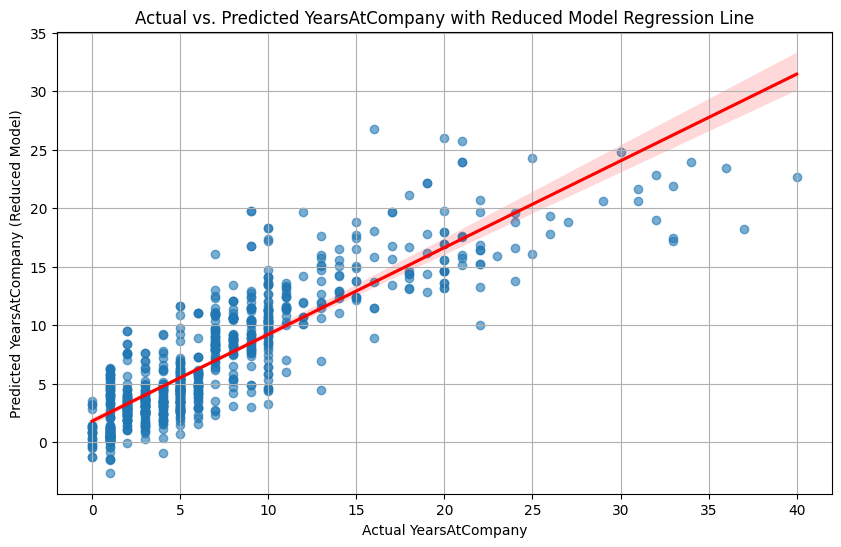

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and fit a new Regression model on the reduced feature set
linear_model_reduced = LinearRegression()
linear_model_reduced.fit(X_train_reduced, y_train)

# Use the new model to predict on the test set
y_pred_linear_reduced = linear_model_reduced.predict(X_test_reduced)

# Evaluate the reduced model using MSE and R-squared
mse_reduced = mean_squared_error(y_test, y_pred_linear_reduced)
r2_reduced = r2_score(y_test, y_pred_linear_reduced)

print(f"Reduced Model Mean Squared Error (MSE): {mse_reduced:.2f}")
print(f"Reduced Model R-squared (R2): {r2_reduced:.2f}")

# Create a chart to visualize the new model
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred_linear_reduced, scatter_kws={'alpha':0.6}, line_kws={"color": "red"})
plt.xlabel("Actual YearsAtCompany")
plt.ylabel("Predicted YearsAtCompany (Reduced Model)")
plt.title("Actual vs. Predicted YearsAtCompany with Reduced Model Regression Line")
plt.grid(True)
plt.show()

### 🔧 Add comment here:

1. **How did the reduced-feature model compare to the full model?**
   The reduced-feature model performed very similarly to the full model. The original model had an R-squared of 0.75 and an MSE of 9.88. The reduced model (using the top 10 features) achieved an R-squared of 0.74 and an MSE of 9.93. This indicates that the reduced model retained nearly all of the predictive power of the full model while using significantly fewer features.

2. **Would this version be easier to explain or use in an HR meeting?**
   Yes, absolutely. A model with only 10 key features is much easier to explain and interpret than a model with 37 features (the original number after encoding). In an HR meeting, it would be much simpler to focus on and discuss the impact of these top 10 variables on employee tenure. This simplification enhances both the interpretability of the model's findings and its practical applicability for HR decision-makers, allowing them to prioritize actions based on the most influential factors.

## Final Task

### Subtask:
Summarize the results of the reduced model, comparing its performance to the full model and discussing its implications for interpretability and use in an HR context.


## Summary:

### Q&A
1.  **How did the reduced-feature model compare to the full model?**
    The reduced-feature model performed very similarly to the full model. The original model had an R-squared of 0.75 and an MSE of 9.88. The reduced model, using the top 10 features, achieved an R-squared of 0.74 and an MSE of 9.93. This indicates that the reduced model retained nearly all of the predictive power of the full model while using significantly fewer features.

2.  **Would this version be easier to explain or use in an HR meeting?**
    Yes, a model with only 10 key features is much easier to explain and interpret than a model with 37 features. This simplification enhances both the interpretability of the model's findings and its practical applicability for HR decision-makers, allowing for a clearer focus on the most influential factors regarding employee tenure.

### Data Analysis Key Findings
*   **Top Features Selection**: The top 10 most important features for predicting `YearsAtCompany` were identified as: `YearsWithCurrManager`, `TotalWorkingYears`, `YearsSinceLastPromotion`, `NumCompaniesWorked`, `Age`, `EducationField_Medical`, `JobRole_Manager`, `MonthlyIncome`, `PercentSalaryHike`, and `JobLevel`.
*   **Reduced Model Performance**: A linear regression model trained on these 10 features achieved a Mean Squared Error (MSE) of 9.93 and an R-squared (R2) of 0.74.
*   **Performance Comparison**: The reduced model's performance (R2 = 0.74, MSE = 9.93) is very close to that of the full model (R2 = 0.75, MSE = 9.88), demonstrating that predictive power was largely retained with a significant reduction in features.

### Insights or Next Steps
*   The high predictive power retained by the reduced model, despite using only 10 features, significantly improves its interpretability and makes it highly suitable for presentation and discussion in HR contexts.
*   Future efforts could focus on further exploring the interactions between these top 10 features to gain deeper insights into employee tenure drivers, potentially leading to targeted HR strategies.
